In [19]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 1. 다항 분포
* 다항 분포(Multinomial distribution) : 카테고리 시도를 $N$번 반복하여 $k \text{ }(k = 1, \dots, K)$가 각각 $x_k$번 나올 확률분포  
즉, 표본값이 벡터 $x = (x_1, \dots, x_k)$가 되는 확률분포   
ex)  
$x = (1, 2, 1, 2, 3, 1)$은 6개의 숫자가 나올 수 잇는 주사위를 10번 던져서 1인 면 2번, 2인 면 2번, 3인 면 1번, 4인 면 2번, 5인 면 3번, 6인 면 1번이 나왔다는 뜻
* 확률질량함수
$$ Mu(x;N,\mu) = \begin{pmatrix}N \\ x \end{pmatrix}\prod_{k=1}^K\mu_k^{x_k} = \begin{pmatrix} N \\ x_1, \dots, x_K \end{pmatrix}\prod_{k=1}^K\mu_k^{x_k} $$
* 이 식의 조합 기호
$$ \begin{pmatrix} N \\ x_1, \dots, x_K \end{pmatrix} = \frac{N!}{x_1! \dots x_K!} $$

## 연습 문제
$K = 2$인 다항 분포의 확률질량함수가 이항 확률분포의 확률질량함수와 같음을 보여라.

# 2. 다항 분포의 모멘트
* 기댓값
$$ E[x_k] = N\mu_k $$
* 분산
$$ Var[x_k] = N\mu_k(1 - \mu_k) $$

# 3. SciPy를 이용한 다항 분포의 시뮬레이션
##### multinomial 클래스
다항 분포를 구현한다.
* `multinomial(N, μ)`
    * `N` : 시행 횟수
    * `μ` : 모수 벡터

#### 5, 6이 더 잘 나오게 조작된 주사위를 30번 던졌을 때 나올 수 있는 경우

In [20]:
import scipy as sp

N = 30
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(N, mu)

In [21]:
# K개의 박스 플롯으로 표시
import numpy as np

np.random.seed(0)
X = rv.rvs(100)
X[:5]

array([[ 3,  4,  3,  3,  8,  9],
       [ 3,  3,  5,  6,  6,  7],
       [ 4,  3,  3,  5,  5, 10],
       [ 1,  0,  5,  5, 12,  7],
       [ 7,  4,  2,  3,  5,  9]])

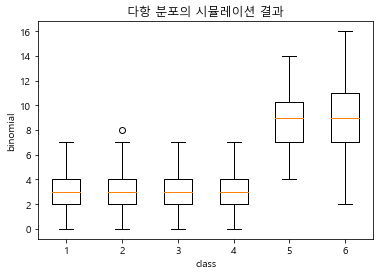

In [22]:
import matplotlib.pyplot as plt

plt.boxplot(X)
plt.title("다항 분포의 시뮬레이션 결과")
plt.xlabel("class")
plt.ylabel("binomial")
plt.show()

#### seaborn 패키지를 사용한 다양한 시각화

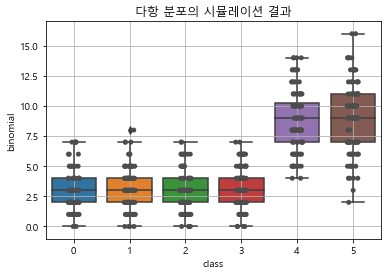

In [23]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(X).stack().reset_index()
df.columns = ["trial", "class", "binomial"]

sns.boxplot(x="class", y="binomial", data=df)
sns.stripplot(x="class", y="binomial", data=df, jitter=True, color=".3")
plt.title("다항 분포의 시뮬레이션 결과")
plt.grid()
plt.show()

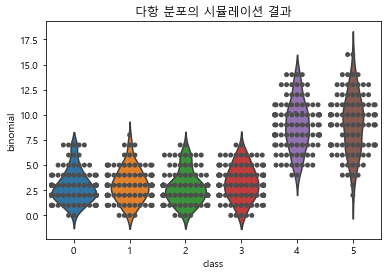

In [26]:
sns.violinplot(x="class", y="binomial", data=df, inner="quartile")
sns.swarmplot(x="class", y="binomial", data=df, color=".3")
plt.title("다항 분포의 시뮬레이션 결과")
plt.show()